<a href="https://colab.research.google.com/github/tracebackrebecca/Data-mining_synthetic-credit-card-data/blob/main/credit_card_default_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data mining project

## Introduction

Credit cards are a method of payment, where the card issuer makes payments on behalf of the card holder, and the card holder is expected to pay back the card issuer. The card issuer generates revenue through interest payments and charges from the card holder, but can lose money if the card holder ultimately does not repay the loan.

In this project we put ourselves in the position of the card issuer, and ask the question: given what we know about an applicant for a credit card – such as their income, age and, most importantly, credit history – should we issue a credit card to the applicant? Or do we expect the applicant to go into bad debt and not repay the loan?

According to the **CRISP-DM model**, data mining projects can be considered to consist of 6 phases. A project does not always proceed linearly through the phases, but the general order is as follows:

1. **Business understanding.** We discuss the credit card market and typical business needs in the *application background and literature review* section.

2. **Data understanding.** We explore the data and its meaning in the *data pre-processing and exploration* section.

3. **Data preparation.** We also prepare and process the data in the *data pre-processing and exploration* section, including **feature engineering** - creating new attributes out of data in formats that were difficult to use.

4. **Modelling.** We model the data to predict credit card behaviour, and therefore what a credit card issuer's decision should be, in the *data modelling and model evaluation* section.

5. **Evaluation.** We also evaluate the models in the *data modelling and model evaluation* section, and compare their performance.

6. **Deployment.** This is the only phase of CRISP-DM that we do not attempt in this document. In a real business setting, the preferred model could be deployed to assess credit card applications.

We begin with the *application background and literature review*.

**Disclaimer:** This project has been produced by John Holden and Rebecca Ding as individuals, and does not represent the view of our employer.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Application background and literature review

One of the largest consumer credit markets regulated by the UK's Financial Conduct Authority (FCA) is the credit card sector. According to research published by Finder.com (2019), there were 61.9 million credit cards issued to UK residents. The FCA conducted a Credit Card Market Study (CCMS) from 2014 to 2016 to review the market landscape and consumer behaviour. The CCMS Interim Report (2015) found that consumers with persistent levels of debt, or who make minimum payments, are profitable for the card issuers. Firms therefore have little incentive to address this and encourage repayment, which concerned the FCA as a conduct regulator. To compete for market share and boost revenue streams, credit card issuers may "overissue" credit cards. However, credit card default risk is a key risk factor for both cardholders and card issuers. The CCMS Interim Report identified that 6.9% of cardholders (around 2 million) were in default or arrears. Consumers in default are extremely unprofitable and firms are active in contacting consumers who miss payments. On a macro level, overissued credit cards and accumulated consumer debt can also become a systemic risk, especially during economic downturns. Therefore, it is crucial to understand firms’ credit decisions and default decisions. 

In this report, we apply data mining techniques to build a prediction model for credit card default, which can be adopted for credit card approval decisions. The CCMS Interim Report defined "default" as "when the customer is past the contractual due date by more than 90 days and the lender reasonably considers that they are unlikely to pay". We adopt the first half of this definition in our research: default is more than 90 days overdue (5-7 on the 7-level scale that will be introduced in the credit record data exploration section, below).

Classification is a classic data mining topic in risk management of financial services. In this specific application domain, many machine learning models such as logistic regression, Bayes classifier and nearest neighbour have been used for consumer credit scoring for more than 20 years (Hand & Henley, 1997). With the development of techniques, artificial neural networks and classification trees became popular to predict credit scores (Thomas, 2000). When an individual applies for a credit card, the card issuer takes the information on completed application forms such as gender (if legal) and income, in combination with credit scores sourced from credit information agencies, to make approval decisions. In terms of attribute selection for credit card default or approval prediction, Bellotti and Crook (2009) found that dynamic models perform better, which include behavioural variables such as payment history and macroeconomic variables, in addition to credit scores and variables from application forms. The inclusion of macroeconomic data also opens an opportunity for stress testing, as extreme economic conditions can be simulated and included in the model to generate a measure of stressed loss - although without specific dates in our dataset this is not something we will model in this project.

Rather than classifying individuals into binary results – 0 and 1 for default and non-default – Yeh and Lien (2007) built a prediction model for the *probability* of default of a credit card. The data they analysed was from a Taiwanese bank, which contained some basic individual information such as gender, marital status and credit card payment history. The data was randomly divided into training and testing sets. The study adopted six methods: K-nearest neighbour, logistic regression, discriminant analysis, naïve Bayesian, neural networks, and classification trees. Adopting a simple linear regression (Y = A + BX), where Y is the real probability of default and X is the predicted probability of default, they concluded that their artificial neural network has the best prediction ability. Its regression intercept A is close to zero and regression coefficient B to one. As the real probability of default is unknown, simulating probability of default is a key challenge. They proposed a "Sorting Smoothing Method" for tackling this issue. The order of the validation data was sorted by the predictive probability, and then binary variables with real default risk of validation data were used for smoothing, to estimate the real probability of default Pi.

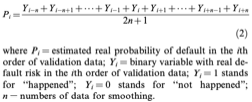

In practice, while some innovative and fintech firms are attempting to use alternative data sources such as social media data to predict credit behaviour, the most important predictor remains credit history. From paragraph 3.6 of the CCMS Interim Report:

> Firms  have  stated  that  consumers  typically  perceived  to  be  lower  risk  tend  to  have  a  good,  established credit history. Consumers are typically perceived to be higher risk because they are either:
* new to credit
* low income/sole trader/self-employed
* credit rebuilders (have had negative credit events in the past)

Therefore to be realistic, we will take this into account by feature engineering a 'credit history' attribute during data pre-processing.

Having reviewed the literature and business application domain, we now turn to our dataset.


## Data in this project

Due to restrictions on sharing company data, we take anonymised data from a Chinese bank available on Kaggle for our project: https://www.kaggle.com/rikdifos/credit-card-approval-prediction. The data consists of two sets: **credit applications**, and **credit records**, linked by individual identity. 

After browsing the datasets, we had a few informal discussions with **domain experts** at our company regarding this project. There are two potential concerns raised: 

1) **Behaviour attributes on credit history** are very important for areas such as credit scoring and default predication, which confirms our literature review results. However, the datasets from Kaggle do not include credit history.  

2) **Imbalanced datasets** create a challenge for data mining in risk management of financial services such as fraud prevention, credit scoring, and non-performing loans predication. Fraud, credit card or loan default activities generally account for a small portion of "real life" behaviours but are the focuses of relevant projects. Considering we have a binary target variable (2 classes), models trained on imbalanced datasets often lead to poor prediction power. There are generally two approaches to tackle this challenge: oversampling and undersampling.

These two concerns will be discussed and addressed in the next section.

## Data pre-processing and exploration
### Why data pre-processing is necessary
Data pre-processing is necessary to understand the structure of the data, and to make sure it is clean and ready to analyse. Poor quality data can lead to a "garbage in, garbage out" sitation where predictions are misleading or even meaningless. Some features are not in a format ready for modelling and must be engineered into a new feature.

### Transforming credit record
The credit record set shows an individual's credit history after obtaining a credit card. It is neccessary to pre-process the credit record data, transforming it into a simple label for each individual, before exploring the credit application data.

### Simulating credit history
Our literature review highlighted that, in the real world, credit card companies assess risk using both personal attributes, such as age and income, and, more important, credit history. Our datasets from Kaggle do not include credit history. Therefore we will simulate credit history by taking the credit record dataset and splitting each individual's credit record of `n` months into 2 parts: the most recent `k` months of credit history, to use as the **label**, and the older `n-k` months of credit record data to transform into an **attribute**.

### Credit record data exploration
Our aim in this section is to explore the credit record data, and transform it into a dataset with 1 row per individual, and 2 columns: *credit history* and *label*. Credit history will be used as an attribute in data modelling. The label will take 1 of 3 values: N for "do not lend", Y for "lend", and E for "exclude" – individuals with insufficient data to be sure about the correct label.

In [ ]:
# Import modules
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import RobustScaler
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFECV, RFE, VarianceThreshold, mutual_info_classif

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
crOriginal = pd.read_csv("/content/drive/My Drive/data/credit_record.csv") # Credit record set
#crOriginal = pd.read_csv("/content/credit_record.csv") # Credit record set

In [ ]:
# Convert statuses to 0-7 scale (string type) for easier analysis
crOriginal.STATUS = crOriginal.STATUS.map({
                       'C': '0',
                       'X': '1',
                       '0': '2',
                       '1': '3',
                       '2': '4',
                       '3': '5',
                       '4': '6',
                       '5': '7'})

crOriginal.info()
crOriginal.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,2
2,5001711,-2,2
3,5001711,-3,2
4,5001712,0,0
5,5001712,-1,0
6,5001712,-2,0
7,5001712,-3,0
8,5001712,-4,0
9,5001712,-5,0


The credit record dataset is over a million entries of 3 variables. Each individual has several months of data indicated by the negative numbers, and for each month a status.

ID and MONTHS_BALANCE are **integers**, while status is an ordered **categorical** variable.

Adapted from the dataset description on Kaggle, the status indicators have the following meaning:

> * 0: No loan for the month
> * 1: Paid off that month
> * 2: 1-29 days past due
> * 3: 30-59 days past due
> * 4: 60-89 days overdue
> * 5: 90-119 days overdue
> * 6: 120-149 days overdue
> * 7: Overdue or bad debts, write-offs for more than 150 days



We begin by transforming the dataset into 1 row for each individual.

In [ ]:
cr = crOriginal.sort_values(['ID', 'MONTHS_BALANCE'], ascending=[True, True])
cr = cr.groupby('ID')['STATUS'].apply(''.join).reset_index()
cr['IN_DATABASE'] = cr['STATUS'].map(len)
cr.head(5)

,ID,STATUS,IN_DATABASE
0,5001711,2221,4
1,5001712,2222222222000000000,19
2,5001713,1111111111111111111111,22
3,5001714,111111111111111,15
4,5001715,1111111111111111111111111111111111111111111111...,60


We now investigate for how long individuals have been in the dataset.

In [ ]:
maxLength = max(cr['IN_DATABASE'])

plt.hist(cr['IN_DATABASE'], bins=maxLength)
plt.title('Length of time credit cards held in dataset')
plt.xlabel('Credit card held (months)')
plt.ylabel('Frequency')
plt.show()

Individuals have been in the dataset for a maximum of 61 months.



#### Split credit history and credit record
We identified in the literature review that real companies rely heavily on credit history, which this dataset lacks. Therefore we will split the credit record into 2 columns: `credit history`, to use as an attribute in modelling, and `credit record`, to turn into a label.

There is more than one way to split the data, but we choose the simple method of taking the most recent 30 months for each individual as their credit record, and the remaining 0-31 months become their credit history. This realistically simulates individuals having different lengths of credit history.

In [ ]:
k = 30

cr['CREDIT_RECORD' ] = cr['STATUS'].str[-k:  ]
cr['CREDIT_HISTORY'] = cr['STATUS'].str[  :-k]

cr['CR_LENGTH'] = cr['CREDIT_RECORD'].map(len)

del cr['STATUS']

cr.head(10)

,ID,IN_DATABASE,CREDIT_RECORD,CREDIT_HISTORY,CR_LENGTH
0,5001711,4,2221,,4
1,5001712,19,2222222222000000000,,19
2,5001713,22,1111111111111111111111,,22
3,5001714,15,111111111111111,,15
4,5001715,60,111111111111111111111111111111,111111111111111111111111111111,30
5,5001717,22,2222222222222222200000,,22
6,5001718,39,212222221222111213121322222000,122222221,30
7,5001719,43,000000000000000000000000000000,2200000000000,30
8,5001720,36,222222222222223232222233233223,222222,30
9,5001723,31,222222221111111111111111111111,1,30


As `CREDIT_HISTORY` is now an attribute we will use for predictive modelling, it is logically part of the credit application data, and we will return to it when exploring that dataset below.

Now it is time to explore `CREDIT_RECORD` more thoroughly, and turn it into a single label for each individual.

#### Label creation
To turn the `credit record` set into a single label value for each individual, it seems reasonable to look at the "worst" status each individual has reached. Here we take "worst" to mean the most months overdue, not a value judgement. We also find how long it took each individual to reach their "worst" status.

In [ ]:
def find_worst(x):
    return max([int(i) for i in str(x)])

cr['WORST'] = cr.CREDIT_RECORD.map(find_worst)

cr.head(5)

,ID,IN_DATABASE,CREDIT_RECORD,CREDIT_HISTORY,CR_LENGTH,WORST
0,5001711,4,2221,,4,2
1,5001712,19,2222222222000000000,,19,2
2,5001713,22,1111111111111111111111,,22,1
3,5001714,15,111111111111111,,15,1
4,5001715,60,111111111111111111111111111111,111111111111111111111111111111,30,1


Let's visualise the "worst" status reached by individuals.

In [ ]:
# Make frequency table of "worst" status
statusFrequencies = cr['WORST'].value_counts()
statusFrequencies = statusFrequencies.to_frame()

# Plot "worst" statuses
plt.bar(list(statusFrequencies.index), statusFrequencies['WORST'], align='center')
plt.ylabel('Frequency')
plt.xlabel('"Worst" status')
plt.title('"Worst" status by frequency')
plt.show()

Clearly the vast majority of individuals in the dataset reached status 2 at "worst": 1-29 days past due. Very few individuals reached statuses 4 or above: this is an **unbalanced** dataset.

Our aim, as stated above, is to create a single label for each individual. Individuals whose "worst" status is 0-2 appear very safe to issue a credit card to. Individuals whose "worst" status is 7 appear unsafe to issue a credit card to, as they have not repaid the debt, which is a loss to the issuer.

Individuals whose "worst" status is 3-6 are less obvious. Being only a few weeks overdue is not a big risk to a diversified lender, and in fact will lead to higher income from interest. However as an individual's debt becomes increasingly overdue, and therefore looks increasingly less likely to be repaid, he/she becomes a bigger risk to the credit card issuer, and the decision to lend a credit card looks increasingly mistaken.

Considering this trade-off, we consider it appropriate to make a cut-off point between statuses 4 and 5. Anyone whose "worst" status was 0-4 will be given the status `Y`: issue a credit card. Anyone whose "worst" status was 5-7 will be given the status `N`: do not issue a credit card. This is also consistent with the definition of "default" in the FCA's Credit Card Market Study, as we identified in the literature review.

In [ ]:
cr['WORST'] = cr['WORST'].astype(int)

cr.loc[cr['WORST'] <  5, 'LABEL'] = "Y"
cr.loc[cr['WORST'] >= 5, 'LABEL'] = "N"

cr.LABEL.value_counts()

Y    45741
N      244
Name: LABEL, dtype: int64

#### Exclude records

However there is one more complication: individuals are unlikely to get into bad debt immediately; typically it will take a few months. Therefore there may be individuals in the dataset for only a few months whose "worst" status is below 5, but who would have gone into bad debt later. These consumers should be excluded from the dataset because they might be **false positives**: individuals who appear safe to issue a credit card to, but actually would go into bad debt given more time.

We need to investigate how long it takes for individuals to reach statuses 5-7, and therefore be labelled `N`.

In [ ]:
def first_instance(row):
    if row['WORST'] < 7:
        return np.NaN
    else:
        num_list = [row['CREDIT_RECORD'].find('5'), row['CREDIT_RECORD'].find('6'), row['CREDIT_RECORD'].find('7')]
        num_list = [item for item in num_list if item >= 0]
        return min(num_list)

cr['TIME_TO_WORST'] = cr.apply(lambda row: first_instance(row), axis=1)

times = cr.TIME_TO_WORST[cr.LABEL == "N"]
binNumber = int(np.max(times))

plt.figure()
plt.hist(times, bins=binNumber)
plt.title('Months taken to reach worst status')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Removing individuals with with label `Y` - i.e. those with "worst" status 0-4 - who have less than 28 months of credit record would remove almost all false positives, but also remove most of our data. But removing those who have been in the dataset just 2 months would keep more of the data at the expense of keeping more false positives. We investigate this trade-off.

In [ ]:
origYs = sum(cr['LABEL'] == "Y") # The number of records that had label Y, before applying time limit

a = np.arange(0, 101, 5) # Steps of 5 from 0 to 100
b = np.nanpercentile(times, a) # Month cut-off value required to remove a% of possible false positives

c = []

for value in b:
    c.append(sum((cr['LABEL'] == "Y") & (cr['CR_LENGTH'] < value)))

proportionRemaining = (origYs-np.array(c))/origYs # Proportion of Y-label individuals remaining after removing a% of possible false positives

In [ ]:
plt.plot(a, proportionRemaining, 'bo-') #bo- indicates blue circles and lines

for x,y,z in zip(a, proportionRemaining, b):

    label = "{:.2f}".format(z)
        
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.title('Trade-off between retaining data records and removing possible false positives, labels show cut-off month number')
plt.ylabel('Proportion of Y-label individuals remaining')
plt.xlabel('False positives removed (% based on known statuses Y)')
plt.show()

As expected, removing all label-Y individuals who have been in the dataset less than X months reduces the number of possible false positives as X increases, but also reduces the size of the dataset.

We decide to make our cutoff at 18 months. This removes 90% of false positives, while keeping more than half (54.4%) of the original data.

In this context, a false positive is a consumer who appears to be safe to lend to, but would actually go on to default given more time.

In [ ]:
cr.loc[(cr['LABEL'] == "Y") & (cr['CR_LENGTH'] <= 18), 'LABEL'] = "E"

cr = cr[["ID", "CREDIT_HISTORY", "LABEL", "CREDIT_RECORD"]]
print(cr.head())
print("")
print(cr.LABEL.value_counts())

        ID  ...                   CREDIT_RECORD
0  5001711  ...                            2221
1  5001712  ...             2222222222000000000
2  5001713  ...          1111111111111111111111
3  5001714  ...                 111111111111111
4  5001715  ...  111111111111111111111111111111

[5 rows x 4 columns]

Y    23754
E    21987
N      244
Name: LABEL, dtype: int64


We can now use this new `LABEL` data to explore its relationship with the attributes, held in the `credit application` dataset. As explained above, `LABEL` can take 3 values:

* E: Exclude
* Y: Issue credit card
* N: Do not issue credit card



### Credit application data exploration

We now explore the credit application data. First, we need to match it to the credit record dataset, using ID as the common field.

In [ ]:
#ar = pd.read_csv("/content/application_record.csv") # Credit record set
ar = pd.read_csv("/content/drive/My Drive/data/application_record.csv")

In [ ]:
print('The application record set contains {} rows and {} unique IDs.'.format(len(ar.index), len(set(ar['ID']))))
print('The credit record set contains {} unique IDs.'.format(len(set(cr['ID']))))
print('The two sets have an overlap of {} IDs.'.format(len(set(ar['ID']).intersection(set(cr['ID'])))))

The application record set contains 438557 rows and 438510 unique IDs.
The credit record set contains 45985 unique IDs.
The two sets have an overlap of 36457 IDs.


In [ ]:
#Pandas Profiling on application_record.csv

#profile = ProfileReport(ar, title="Pandas Profiling on application_record.csv")
#profile.to_file("/Users/xinyueding/Dropbox/You and Me/MSc in Applied Data Science/Spyder/Data mining project/ar_report.html")
#profile.to_widgets()

We remove duplicates from the application record set, then do an inner merge, and finally remove all rows with label E. As explained above, we exclude these individuals because their credit record is not long enough to determine whether the individuals would have entered bad debt.

In [ ]:
ar = ar.drop_duplicates(subset=['ID'])
ar = pd.merge(ar, cr, on='ID', how='inner')

In [ ]:
ar = ar[ar['LABEL'] != 'E']

Now that we have 1 row for each individual, and we have merged the credit record set with the credit application set, we can explore the data further.

#### Data types

In [ ]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17625 entries, 2 to 36454
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17625 non-null  int64  
 1   CODE_GENDER          17625 non-null  object 
 2   FLAG_OWN_CAR         17625 non-null  object 
 3   FLAG_OWN_REALTY      17625 non-null  object 
 4   CNT_CHILDREN         17625 non-null  int64  
 5   AMT_INCOME_TOTAL     17625 non-null  float64
 6   NAME_INCOME_TYPE     17625 non-null  object 
 7   NAME_EDUCATION_TYPE  17625 non-null  object 
 8   NAME_FAMILY_STATUS   17625 non-null  object 
 9   NAME_HOUSING_TYPE    17625 non-null  object 
 10  DAYS_BIRTH           17625 non-null  int64  
 11  DAYS_EMPLOYED        17625 non-null  int64  
 12  FLAG_MOBIL           17625 non-null  int64  
 13  FLAG_WORK_PHONE      17625 non-null  int64  
 14  FLAG_PHONE           17625 non-null  int64  
 15  FLAG_EMAIL           17625 non-null 

The attributes `CODE_GENDER`, `FLAG_OWN_CAR`, and `FLAG_OWN_REALTY` can be turned into Boolean variables, as can `LABEL` (by definition not an attribute).

`CNT_CHILDREN` is, correctly, an integer type. `CNT_FAM_MEMBERS` is a float but should also be an integer.

`DAYS_BIRTH` and `DAYS_EMPLOYED` are correctly integers, but are negative numbers – this will be easier to conceptualise as positive numbers.

In [ ]:
# Convert 3 attributes & 1 label to booleans
ar = ar.replace({'CODE_GENDER'    : {'F': 1, 'M': 0}})
ar = ar.replace({'FLAG_OWN_CAR'   : {'Y': 1, 'N': 0}})
ar = ar.replace({'FLAG_OWN_REALTY': {'Y': 1, 'N': 0}})
ar = ar.replace({'LABEL'          : {'Y': 1, 'N': 0}})

ar = ar.rename(columns={'CODE_GENDER': 'CODE_FEMALE'})

# Convert 1 float to integer
ar['CNT_FAM_MEMBERS'] = ar['CNT_FAM_MEMBERS'].astype(np.int64)

# Convert 2 negative integer attributes to positive integers
ar['DAYS_BIRTH'   ] = -ar['DAYS_BIRTH'   ]
ar['DAYS_EMPLOYED'] = -ar['DAYS_EMPLOYED']

#### Missing values

In [ ]:
ar.isnull().sum()
ar['OCCUPATION_TYPE'].value_counts()

Laborers                 2955
Core staff               1783
Sales staff              1585
Managers                 1550
Drivers                  1112
High skill tech staff     775
Medicine staff            619
Accountants               596
Cooking staff             297
Security staff            274
Cleaning staff            255
Private service staff     142
Low-skill Laborers         83
Secretaries                73
Waiters/barmen staff       58
HR staff                   34
IT staff                   31
Realty agents              24
Name: OCCUPATION_TYPE, dtype: int64

Across all attributes, only OCCUPATION_TYPE has missing values.

As missing OCCUPATION_TYPE might indicate uncertainty on income resources, which could affect an individual's ability to repay, we fill in "no occupation info" for missing values here.

In [ ]:
ar['OCCUPATION_TYPE'].fillna('No occupation info', inplace=True)

#### Categorical variables
`NAME_INCOME_TYPE`, `NAME_FAMILY_STATUS`, `NAME_HOUSING_TYPE`, and `OCCUPATION_TYPE` are **nominal (unordered) categorical variables** and can be turned into **dummy variables**.

`NAME_EDUCATION_TYPE` is an **ordinal (ordered) categorical** variable.

We explore the values that these attributes can take:

In [ ]:
for i in ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE']:
    print()
    print(i)
    print('Levels: ' + str(ar[i].value_counts().count()))
    print(ar[i].value_counts())


NAME_INCOME_TYPE
Levels: 5
Working                 9038
Commercial associate    4193
Pensioner               2859
State servant           1527
Student                    8
Name: NAME_INCOME_TYPE, dtype: int64

NAME_FAMILY_STATUS
Levels: 5
Married                 12528
Single / not married     2076
Civil marriage           1313
Separated                1025
Widow                     683
Name: NAME_FAMILY_STATUS, dtype: int64

NAME_HOUSING_TYPE
Levels: 6
House / apartment      15838
With parents             781
Municipal apartment      551
Rented apartment         240
Office apartment         129
Co-op apartment           86
Name: NAME_HOUSING_TYPE, dtype: int64

OCCUPATION_TYPE
Levels: 19
No occupation info       5379
Laborers                 2955
Core staff               1783
Sales staff              1585
Managers                 1550
Drivers                  1112
High skill tech staff     775
Medicine staff            619
Accountants               596
Cooking staff             297
Se

A visual inspection of these categorical variables raises some questions.

In the `NAME_EDUCATION_TYPE` attribute, what exactly is the difference between `higher education` and `academic degree`? Because these appear to mean the same thing, and given the small number of people in the latter category, we group them together. This leaves 4 levels in a clear order from least educated to most educated: `Lower secondary`, then `Secondary / secondary special`, then `Incomplete higher`, then `Higher education`.


In [ ]:
# First, rename all values to be a single string with no spaces
ar = ar.replace(' ', '_' , regex=True)
ar = ar.replace('/', 'or', regex=True)

# Education type
ar['NAME_EDUCATION_TYPE'] = ar['NAME_EDUCATION_TYPE'].replace('Academic_degree', 'Higher_education')

# Integer encoding for eduction type
ar.NAME_EDUCATION_TYPE = ar.NAME_EDUCATION_TYPE.map({
                       'Lower_secondary': 0,
                       'Secondary_or_secondary_special': 1,
                       'Incomplete_higher': 2,
                       'Higher_education': 3})

In [ ]:
# One-hot encoding for nominal categorical variables
ar = pd.get_dummies(ar, columns=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
                                 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [ ]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17625 entries, 2 to 36454
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        17625 non-null  int64  
 1   CODE_FEMALE                               17625 non-null  int64  
 2   FLAG_OWN_CAR                              17625 non-null  int64  
 3   FLAG_OWN_REALTY                           17625 non-null  int64  
 4   CNT_CHILDREN                              17625 non-null  int64  
 5   AMT_INCOME_TOTAL                          17625 non-null  float64
 6   NAME_EDUCATION_TYPE                       17625 non-null  int64  
 7   DAYS_BIRTH                                17625 non-null  int64  
 8   DAYS_EMPLOYED                             17625 non-null  int64  
 9   FLAG_MOBIL                                17625 non-null  int64  
 10  FLAG_WORK_PHONE                   

In [ ]:
# Remove 1 column from each categorical variable, keep dataset linearly independent
ar = ar.drop(['NAME_INCOME_TYPE_State_servant',
              'NAME_FAMILY_STATUS_Widow',
              'NAME_HOUSING_TYPE_Co-op_apartment',
              'OCCUPATION_TYPE_Realty_agents'],
             axis=1)

#### Duplicated data
One might wonder which `occupation type` is compatible with the 8 records of `income type` *student*. The answer, apparently, is *core worker* – but examining the records brings a new issue to light:

In [ ]:
# View students
student = ar[ar['NAME_INCOME_TYPE_Student'] == 1]
student[['ID', 'CODE_FEMALE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
         'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
         'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
         'OCCUPATION_TYPE_Core_staff', 'NAME_HOUSING_TYPE_House_or_apartment',
         'NAME_FAMILY_STATUS_Married', 'CREDIT_HISTORY',
         'LABEL', 'CREDIT_RECORD']]

,ID,CODE_FEMALE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,OCCUPATION_TYPE_Core_staff,NAME_HOUSING_TYPE_House_or_apartment,NAME_FAMILY_STATUS_Married,CREDIT_HISTORY,LABEL,CREDIT_RECORD
1316,5010456,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,1112111,1,111111111111110000000000000000
1317,5010457,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,2222220000,1,000000000000000000000000000000
1318,5010458,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,12222222222220000000,1,000000000000000000000000000000
1319,5010459,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,1222211111,1,111000000000000000000000000000
1320,5010460,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,1222,1,211111111000000000000000000000
1321,5010461,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,122221,1,111111100000000000000000000000
1322,5010462,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,,1,222222000000000000000000000
1323,5010463,1,0,1,0,171000.0,3,18756,3904,2,1,1,1,,1,122221111111100000000000000000


These 8 records have unique `ID`, and unique `CREDIT_RECORD` and `CREDIT_HISTORY`. But all their other attributes are identical. It is almost impossible that all 8 students are women with annual income 171000 and age 18756 days. This appears to be the same person 8 times: but then why do they have different credit records? This could be a problem with the dataset, perhaps introduced during anonymisation, but we are unable to explore further due to time constraints. We will trust the dataset as given, and treat these as 8 unique individuals.

#### Credit history

The credit history data, which we created by splitting off part of the credit record, above, is currently stored as a string of digits. We need to convert this into one or more meaningful values for modelling.


This conversion needs the following 3 properties:

1.   Credit history with low monthly values preferred to credit history with high monthly values. For example, `11111111` preferred to `11112347`.
2.   Longer clean credit history preferred to shorter clean credit history. For example, `11111111` preferred to `1111`.
3.   More distant "bad" months preferred to more recent "bad" months. For example, `611111` preferred to `111116`. (Recall that credit history is read from left to right, oldest to newest.)

It is not obvious how missing or very short credit histories should be ranked. Is no credit history better or worse than `34`, or is `2` better or worse than `42222`? These are not obvious a priori. It would be useful to have more than one measure of credit history so that the models can learn connections like these.

For these reasons, we decide to convert credit history into 2 attributes: (1) `CH_SCORE`, which uses a mathematical function described below that fulfils all 3 properties, and (2) `CH_LENGTH`, which is simply a count of months of credit history. Intuitively, CH_LENGTH could determine how much weight to place on CH_SCORE – but the machine learning algorithms could use it differently.

CH_SCORE treats a month score of 4 as equivalent to no data, penalising 5-7 (default) more than having no data.

We calculate CH_SCORE from credit history using this formula:

$$
\text{CH_SCORE}=\sum_{n=1}^{k}(\frac{1}{\sqrt{n}}(4-i_{n}))
$$

Where $k$ is the number of months of credit history, $i_1$ being the most recent and $i_k$ the oldest. Each additional month of credit history 0-3 adds positively to CH_SCORE, but in a descending geometric weighting according to the function $y=n^{-1/2} $: a gradually decreasing slope in the domain $n\geq1$. Longer credit histories therefore add up to a higher CH_SCORE, but by decreasing intervals. Months with status 5-7 reduce CH_SCORE, but their impact is diminished over time. All 3 properties established above are satisfied.

The purpose of the negative exponent of $n$ is to reduce the weighting of a month over time. The greater the absolute value of this exponent, the more that recent months will be weighted compared to older months. Intuitively, the simplest method would be to use an exponent of -1, but this would weight the most recent month 2x as strongly as the second most recent month, which we felt was too steep a gradient. We therefore use -0.5, but acknowledge that other exponents (and indeed other *credit history* to *credit history score* conversion systems) could prove superior.

In [ ]:
# Create credit history score
def calculate_ch_score(row):
    x = row['CREDIT_HISTORY']
    if x == '':
        return 0
    else:
        temp_list = []
        for n in range(1,len(x)+1):
            i = int(x[-n])
            value = (1/math.sqrt(n))*(4-i)
            temp_list.append(value)
        return(sum(np.array(temp_list)))

def length_of_history(row):
    x = row['CREDIT_HISTORY']
    return(len(x))

ar['CH_SCORE' ] = ar.apply(lambda row: calculate_ch_score(row), axis=1)
ar['CH_LENGTH'] = ar.apply(lambda row: length_of_history(row) , axis=1)

#### Scale numeric data

It is important to scale the data, for some machine learning algorithms such as K Nearest Neighbours. KNN uses a distance metric between records, which will be heavily weighted towards some features that have large absolute values, such as income, and almost completely ignore other features that have small absolute values, such as the number of children, unless we rescale the features appropriately.

In [ ]:
# Rescale data
num_cols = ar.columns[ar.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = RobustScaler() 
ar[num_cols] = scaler.fit_transform(ar[num_cols])

#### Imbalanced data - Synthetic Minority Over-Sampling Technique (SMOTE)

In [ ]:
# View value counts
print(cr.LABEL.value_counts())

Y    23754
E    21987
N      244
Name: LABEL, dtype: int64


Our dataset is **imbalanced**: there are approximately 100x as many Ys as Ns. As undersampling the Y group would lead to a very small dataset, and oversampling the N group could cause model overfitting on duplicated data points, we chose to use the Synthetic Minority Over-Sampling Technique (SMOTE), generating new data points that are similar to the minority class (N).

An alternative would be to change the model evaluations to disproportionately penalise incorrect classifications of the N group.

In [ ]:
y = ar['LABEL']
x = ar.drop(['ID', 'LABEL', 'CREDIT_HISTORY', 'CREDIT_RECORD'], axis=1)

oversample = SMOTE()
x_balanced, y_balanced = oversample.fit_sample(x, y)

x_balanced = pd.DataFrame(x_balanced, columns = x.columns)
y_balanced = pd.DataFrame(y_balanced)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
del(ar, cr)

#### Initial feature selection 

Now that we have a workable dataset, we explore the relationships between the attributes and each other, and with the label.

4 of the columns are contact details: `FLAG_MOBIL`, `FLAG_WORK_PHONE`, `FLAG_PHONE`, and `FLAG_EMAIL`. We hypthesise that they don't contain useful information for modelling. We run a logistic model between x and y to select features. x has 46 features and, assuming 4 of them should be dropped, we ask the model to select 42 out of 46 features to see if the 4 features of "contact details" will indeed be ranked the lowest.

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 42)
fit = rfe.fit(x, y)
print("Num Features: %s"      % (fit.n_features_))
print("Selected Features: %s" % (fit.support_)   )
print("Feature Ranking: %s"   % (fit.ranking_)   )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num Features: 42
Selected Features: [ True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 3 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 4 1 1 1 1
 1 1 1 1 1 1 1 1 1]


The ranking suggests that we should drop DAYS_EMPLOYED, FLAG_MOBIL, and FLAG_WORK_PHONE, as the least relevant features.

It also suggests that we should drop NAME_FAMILY_STATUS_Single_or_not_married - however we decide to keep it, due to its rank and nature as one of the categories for family status.

In [ ]:
x_balanced.info()
x_balanced = x_balanced.drop(['DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34788 entries, 0 to 34787
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CODE_FEMALE                               34788 non-null  float64
 1   FLAG_OWN_CAR                              34788 non-null  float64
 2   FLAG_OWN_REALTY                           34788 non-null  float64
 3   CNT_CHILDREN                              34788 non-null  float64
 4   AMT_INCOME_TOTAL                          34788 non-null  float64
 5   NAME_EDUCATION_TYPE                       34788 non-null  float64
 6   DAYS_BIRTH                                34788 non-null  float64
 7   DAYS_EMPLOYED                             34788 non-null  float64
 8   FLAG_MOBIL                                34788 non-null  float64
 9   FLAG_WORK_PHONE                           34788 non-null  float64
 10  FLAG_PHONE                        

In [ ]:
####################################### Open x_balanced and y_balanced from saved files #save first without indexes
x_balanced = pd.read_csv("/content/drive/My Drive/data/x_balanced.csv")
y_balanced = pd.read_csv("/content/drive/My Drive/data/y_balanced.csv")



## Data modelling and model evaluation

Now we model the data, to attempt to predict whether a consumer will go into default. This information could be used by a card issuer to decide whether to issue a consumer a credit card.

### Set up, training and testing sets

In [ ]:
# Import modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, RFECV, RFE, VarianceThreshold, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix as cm

In [ ]:
# Set up training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size = 0.2, random_state=1)

### Initial modelling

We will model the data using 6 techniques: KNN, Decision Tree, Random Forest, LightGBM, Logistic Regression, and Support Vector Classifier.

First we try these 6 techniques with their (scikit-learn) default parameters as a baseline.

In [ ]:
# Initialise classifier models, with default parameters
models = []
models.append(('KNN'     , KNeighborsClassifier()   )) 
models.append(('DT'      , DecisionTreeClassifier() )) 
models.append(('RF'      , RandomForestClassifier() ))
models.append(('LightGBM', LGBMClassifier()         ))
models.append(('LR'      , LogisticRegression()     )) 
models.append(('SVC'     , SVC(probability=True)    ))

names  = []
scores = []

for name, model in models: 
    print(str(name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores}) 
print(tr_split)

del(y_pred)

KNN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


DT
RF


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


LightGBM


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

SVC
       Name     Score
0       KNN  0.972550
1        DT  0.985484
2        RF  0.996263
3  LightGBM  0.996263
4        LR  0.695458
5       SVC  0.970825


After using SMOTE, approximately half the data has label 0, and half has label -1. Therefore predicting the results at random, we would expect a score of 0.5. These initial scores of 0.98+ are already quite high.

### Model tuning

The results from our initial modelling suggest that the attributes can be used effectively to predict the labels, and the most accurate results from these initial models were **Random Forest** and **LightGBM**.

We now develop the models further.

#### K Nearest Neighbours (KNN)

We begin with K Nearest Neighbours. This model uses a distance measure between records, and classifies a given record according to the most common label in its k nearest neighbours. For example, if k = 3 and the 3 nearest neighbours are Y, Y and N, the record will be predicted label Y.

In [ ]:
# Try KNN in range k = 1-12
for n in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train, y_train)
    
    print("n = ", n)
    print('Train and test scores:')
    print(knn.score(X_train, y_train))
    print(knn.score(X_test , y_test ))
    print()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  1
Train and test scores:
0.9978799856270212
0.9877838459327393



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  2
Train and test scores:
0.9912324829320877
0.9798792756539235



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  3
Train and test scores:
0.9913402802730866
0.9800229951135384



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  4
Train and test scores:
0.982500898311175
0.9712561080770337



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  5
Train and test scores:
0.9828961552281711
0.9724058637539523



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  6
Train and test scores:
0.9725116780452748
0.962345501580914



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  7
Train and test scores:
0.9735896514552641
0.9637826961770624



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  8
Train and test scores:
0.9658641753503413
0.9561655648174763



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  9
Train and test scores:
0.9675170679123248
0.958033917792469



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  10
Train and test scores:
0.9568451311534315
0.9488358723771199



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


n =  11
Train and test scores:
0.9584261588214157
0.9511353837309572



The accuracy peaks immediately when n = 1, and then gets progressively less accurate.



In [ ]:
# Fit the 1 neighbour model
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Find confusion matrix and accuracy metrics
con_mat = cm(y_test, y_pred, [-1, 0])
total_accuracy = (con_mat[-1, -1] + con_mat[0,0]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[-1, -1] / float(np.sum(con_mat[-1, :])))
class2_accuracy = (con_mat[0,0] / float(np.sum(con_mat[0, :])))

# Print metrics
print(con_mat)
print('Total accuracy: %.3f'  % total_accuracy )
print('-1 accuracy: %.3f'     % class1_accuracy)
print(' 0 accuracy: %.3f'     % class2_accuracy)

The confusion matrix confirms that in almost all cases, the predictions were correct.

This result might be because we used SMOTE to synthetically generate records similar to the existing N category, so for the N group the nearest neighbour will very often be a synethically generated data point, also of class N.

Another method to choose the hyperparameters, such as the value of k, is to use Grid Search Cross Validation, testing the models on out-of-sample data, and only comparing to the testing set at the end for a final validation. This also indicates the most accurate performance when k=1.

In [ ]:
# KNN with GridSearchCV
knn = KNeighborsClassifier()

knn_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, knn_grid, cv=5, n_jobs=4)
knn_gscv.fit(X_train, y_train)

print(knn_gscv.best_params_)

# Compare predictions to test set
knn_pred = knn_gscv.predict(X_test)
knn_pred_score = accuracy_score(y_test, knn_pred)

print('accuracy score with tuned hyperparameters:', knn_pred_score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 1}
accuracy score with tuned hyperparameters: 0.9877838459327393


####Mutual information

We now use **mutual information** to do further **feature selection**.

mutual information between two random variables measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [ ]:
X_features = X_train.columns.values

## use SelectKBest (mutual information)
mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
mutual_info.fit(X_train, y_train)
	
print("Features sorted by their score:")
print(sorted(zip(map(lambda X: round(X, 4), 
                     mutual_info.scores_), X_features), 
             reverse=True))

mutual_info_rankinglist = mutual_info.scores_.tolist()
mi_selected_cols = [n for im, n in enumerate(X_features) if mutual_info_rankinglist[im]!=0]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features sorted by their score:
[(0.3781, 'AMT_INCOME_TOTAL'), (0.3247, 'CH_LENGTH'), (0.273, 'CH_SCORE'), (0.258, 'DAYS_BIRTH'), (0.1051, 'NAME_EDUCATION_TYPE'), (0.0815, 'FLAG_OWN_REALTY'), (0.0813, 'FLAG_OWN_CAR'), (0.0784, 'CODE_FEMALE'), (0.0767, 'CNT_FAM_MEMBERS'), (0.0607, 'NAME_INCOME_TYPE_Working'), (0.0606, 'FLAG_PHONE'), (0.0531, 'NAME_INCOME_TYPE_Commercial_associate'), (0.052, 'CNT_CHILDREN'), (0.0499, 'OCCUPATION_TYPE_Laborers'), (0.0421, 'NAME_FAMILY_STATUS_Married'), (0.0419, 'OCCUPATION_TYPE_Core_staff'), (0.0395, 'NAME_FAMILY_STATUS_Civil_marriage'), (0.038, 'NAME_HOUSING_TYPE_House_or_apartment'), (0.0365, 'OCCUPATION_TYPE_No_occupation_info'), (0.0355, 'NAME_FAMILY_STATUS_Single_or_not_married'), (0.0354, 'OCCUPATION_TYPE_Drivers'), (0.0339, 'OCCUPATION_TYPE_Sales_staff'), (0.0309, 'OCCUPATION_TYPE_Managers'), (0.0226, 'NAME_INCOME_TYPE_Pensioner'), (0.0197, 'NAME_FAMILY_STATUS_Separated'), (0.0182, 'NAME_HOUSING_TYPE_Municipal_apartment'), (0.018, 'OCCUPATION_TYPE_

In [ ]:
knn_gscv.fit(X_train[mi_selected_cols], y_train)

print(knn_gscv.best_params_)

knn2_pred = knn_gscv.predict(X_test[mi_selected_cols])
knn2_pred_score = accuracy_score(y_test, knn2_pred)

print('accuracy score with tuned hyperparameters & further features selection:', knn2_pred_score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 1}
accuracy score with tuned hyperparameters & feature selection: 0.9895084794481173


#### Logistic Regression


Based on the initial modelling, logistic regression had the lowest predication accuracy score. We see if the score can be improved in its prediction power through model tuning.

We introduce a regularisation term here using two hyperparameters: 'penalty' and 'C'.

* The default penalty is l2 - Ridge Regression. Here we ask the model to choose between Ridge (l2) and Lasso (l1) regressions. Ridge adds the "squared magnitude" of the coefficient as the penalty term to the loss function, while Lasso adds "absolute value of magnitude" of the coefficient as the penalty term to the loss function. Both can help prevent overfitting but apply different penalty weightings to different levels of error.

* 'C' specifies the degree of regularisation – smaller values indicate stronger regularisation.

In [ ]:
log_reg = LogisticRegression()   

logit_grid = {'penalty': ['l1', 'l2'], 'C':[0.001,.009,0.01,.09,1,5,10,25]}

logit_gscv = GridSearchCV(log_reg, logit_grid, cv=5, n_jobs=4)

logit_gscv.fit(X_train, y_train)

print('the hyperparameters selected for logistic regression:', logit_gscv.best_params_)

logit_pred = logit_gscv.predict(X_test)
logit_pred_score = accuracy_score(y_test, logit_pred)

print('accuracy score with tuned hyperparameters:', logit_pred_score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the hyperparameters selected for logistic regression: {'C': 0.09, 'penalty': 'l2'}
accuracy score with tuned hyperparameters: 0.6979016958896235


The hyperparameters chosen through training are **Ridge** as the penalty term with a relatively smaller **C - 0.09**.

However, the accuracy score has not been improved much from the initial modelling (0.695 compared to 0.698).

As Lasso shrinks the less important features' coefficients to zero, it can help with features selection. As the model recommonded here is a Ridge model, below we apply the tuned model with the further selected features based on mutual information.

In [ ]:
# Apply the tuned model with the further selected features based on 
# mutual information to see if the predication score can be improved further

logit_gscv.fit(X_train[mi_selected_cols], y_train)

print(logit_gscv.best_params_)

logit3_pred = logit_gscv.predict(X_test[mi_selected_cols])
logit3_pred_score = accuracy_score(y_test, logit3_pred)

print('accuracy score with tuned hyperparameters & further features selection:', logit3_pred_score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 0.09, 'penalty': 'l2'}
accuracy score with tuned hyperparameters & feature selection: 0.6994826099453866


The accuracy score has increased slightly from the previous logistic models, but is still not enough to challenge the other machine learning approaches.

#### Support Vector Classifier


A Support Vector Classifier tries to find the best hyperplane to separate the different classes by maximising the distance between training data points and the hyperplane.

* 'Kernel' selects the type of hyperplane used to separate the data. We use the default type 'rbf' here, which is a non-linear hyperplane.
* 'Gamma' is a parameter for non-linear hyperplanes. The higher the gamma value, the more it tries to exactly fit the training data set, which could potentially cause overfitting.
* 'C' here is the regularisation parameter. 



In [ ]:
# Support Vector Classifer model
svc = SVC()

svc_grid = {'kernel': ['rbf'], 
            'gamma': ['scale', 0.1, 1, 10], 'C': [0.1, 1, 10, 20]}

svc_gscv = GridSearchCV(svc, svc_grid, cv=5, n_jobs=4)

svc_gscv.fit(X_train, y_train)

print('the hyperparameters selected for SVC:', svc_gscv.best_params_)

svc_pred = svc_gscv.predict(X_test)
svc_pred_score = accuracy_score(y_test, svc_pred)

print('accuracy_score with tuned hyperparameters:', svc_pred_score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 20, 'gamma': 1, 'kernel': 'rbf'}
accuracy_score with tuned hyperparameters: 0.9932451853981029


With SVMs, C helps with feature selection. The smaller C, the fewer features selected.

Here, the tuned model comes with 20 as 'C' and 1 as 'gamma', with a high accuracy score.

#### Decision Tree


Decision trees are relatively easy to understand and interpret, as the process from an input to output is **open/white box**: a series of questions in the nodes, each concerning a single attribute, leading to the target value in the leaves. Because our target variable 'LABEL' is discrete rather than continuous, in this case the model is a **classification tree**, as opposed to a regression tree which would have a continuous output.

Decision trees do not require data scaling, or even dummy variables. However we continue to use the same dataset for consistency with the other models.

There are two measures the decision tree can use, to decide how to split **internal nodes** (decision points): entropy, and the gini index. The gini index is the default. We compare the two using a decision tree of maximum depth 4 and a minimum of 5% of data points required to split a node.

In [ ]:
# Instantiate dt_entropy and dt_gini
dt_entropy = DecisionTreeClassifier(max_depth = 4, criterion='entropy', 
                                    random_state = 1, min_samples_split = 0.05)
dt_gini    = DecisionTreeClassifier(max_depth = 4, criterion='gini'   , 
                                    random_state = 1, min_samples_split = 0.05)

# Fit the models to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(   X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.05,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Predict test set labels
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini    = dt_gini.predict(   X_test)

# Evaluate accuracies
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini    = accuracy_score(y_test, y_pred_gini   )

# Print accuracies
print('Accuracy achieved by using entropy: ', accuracy_entropy)
print('Accuracy achieved by using gini: '   , accuracy_gini   )

Accuracy achieved by using entropy:  0.6806553607358437
Accuracy achieved by using gini:  0.7342627191721759


The gini index results in significantly higher accuracy.

We kept the depth at 4, quite low, to be able to easily interpret and visualise the tree – one of the advantages of a single decision tree model.

In [ ]:
# Visualise decision tree
text_representation = tree.export_text(dt_gini,
                                       feature_names = x_balanced.columns.values.tolist())
print(text_representation)

|--- CH_SCORE <= 0.69
|   |--- CH_LENGTH <= -0.17
|   |   |--- OCCUPATION_TYPE_Core_staff <= 0.00
|   |   |   |--- FLAG_OWN_REALTY <= -0.00
|   |   |   |   |--- class: -1
|   |   |   |--- FLAG_OWN_REALTY >  -0.00
|   |   |   |   |--- class: 0
|   |   |--- OCCUPATION_TYPE_Core_staff >  0.00
|   |   |   |--- OCCUPATION_TYPE_Core_staff <= 1.00
|   |   |   |   |--- class: -1
|   |   |   |--- OCCUPATION_TYPE_Core_staff >  1.00
|   |   |   |   |--- class: -1
|   |--- CH_LENGTH >  -0.17
|   |   |--- CH_SCORE <= -0.10
|   |   |   |--- CH_SCORE <= -1.49
|   |   |   |   |--- class: 0
|   |   |   |--- CH_SCORE >  -1.49
|   |   |   |   |--- class: -1
|   |   |--- CH_SCORE >  -0.10
|   |   |   |--- FLAG_OWN_CAR <= 1.00
|   |   |   |   |--- class: -1
|   |   |   |--- FLAG_OWN_CAR >  1.00
|   |   |   |   |--- class: 0
|--- CH_SCORE >  0.69
|   |--- OCCUPATION_TYPE_Core_staff <= 0.00
|   |   |--- OCCUPATION_TYPE_High_skill_tech_staff <= 0.03
|   |   |   |--- OCCUPATION_TYPE_Cooking_staff <= 0.01
|   |

The diagram above is a visualisation of the 4-level decision tree so that we can inspect how it works.

The decision tree begins by examining CH_SCORE, credit history. For individuals with a low credit score it then examines the length of their credit history – perhaps to distinguish individuals with a history of bad debt from individuals who simply have little data. For individuals with a high credit score, it moves straight to looking at occupation.

We now introduce an ensemble method: **bootstrap aggregation**, often shortened to **bagging**. This involves using one algorithm, trained many times on different subsets of the training set, then **voting** on the best label. This reduces **variance**: the type of error caused by **overfitting**, when a model follows the training set too closely, reflecting noise rather than signal.

In [ ]:
# Bagging
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'gini', random_state = 1)

bc = BaggingClassifier(base_estimator = dt, 
                       n_estimators = 50,
                       oob_score = True,
                       random_state = 1)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)

acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set accuracy: 0.753, OOB accuracy: 0.748


The bootstrap aggregating (bagging) model at depth 4 has accuracy of just over 75%, which is slightly higher than the single decision tree. This is very similar to the **Out Of Bag (OOB)** score, calculated as the mean of the 50 prediction errors calculated while the bagging model was being fitted.

Although the bagging model has slightly higher accuracy than a single tree, it can no longer be easily visualised and converted into rules.

#### Random Forest


Random forests are, like bootstrap aggregating, a type of ensemble model. Many decisions trees are genererated (hence the name 'forest'), each using a subset of the training data and, unlike bagging, each using a random subset of *features*. In a classification random forest, the final output is chosen by majority voting from the decision trees.

In [ ]:
# Train random forest
rf = RandomForestClassifier(n_estimators = 50,
                           random_state = 2)
          
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
# Test random forest
y_pred = rf.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)

print('Random forest accuracy: ', acc_test)

Random forest accuracy:  0.9955446967519402


This gives an accuracy of over 99%: much higher than bagging!

Random forests can indicate feature importance. This works by randomly shuffling a feature's values in the out-of-bag sample within each tree, so that its predictive power becomes zero, and measuring how much this decreases the prediction accuracy. This can then be averaged across all trees in the forest, and each feature given a score. In total these add to 1.

In [ ]:
importances = pd.Series(data = rf.feature_importances_,
                        index = X_train.columns)

print(importances.sort_values(ascending = False))

CH_SCORE                                    0.121192
AMT_INCOME_TOTAL                            0.079787
DAYS_BIRTH                                  0.076302
FLAG_OWN_CAR                                0.062976
NAME_EDUCATION_TYPE                         0.055188
CH_LENGTH                                   0.050596
FLAG_OWN_REALTY                             0.049069
CODE_FEMALE                                 0.045924
FLAG_PHONE                                  0.042644
CNT_FAM_MEMBERS                             0.036918
NAME_INCOME_TYPE_Working                    0.035488
OCCUPATION_TYPE_Core_staff                  0.031119
CNT_CHILDREN                                0.029460
OCCUPATION_TYPE_Laborers                    0.026791
NAME_INCOME_TYPE_Commercial_associate       0.025731
NAME_FAMILY_STATUS_Civil_marriage           0.023367
NAME_FAMILY_STATUS_Married                  0.021039
OCCUPATION_TYPE_No_occupation_info          0.020057
OCCUPATION_TYPE_Managers                    0.

CH_SCORE, the credit history feature we created during data exploration and analysis, is the most important feature. This is a pleasing result as it matches industry practice, where credit history is considered the strongest predictive feature, and therefore credit information is a large market in all developed economies.

The next few most important features also make intuitive sense, as they suggest high income or wealth, and therefore people likely to be able to repay their credit card debt: income, age, whether they own a car, and education level.

At number 6 is credit history length, our second measure of credit history.

At the other end of the scale, the occupation types and housing types did not show much predictive power.

#### LightGBM

Light Gradient Boosting Machine (LightGBM) is a gradient boosting framework designed by Microsoft, based on decision tree algorithms.

It has gained popularity due to its speed, efficiency, and lower memory usage.

LightGBM is sensitive to overfitting and so is more suitable for larger datasets. 

We tune the hyperparameters 'num_leaves' and 'min_data_in_leaf' here.

*   'num_leaves': Light GBM grows a tree leaf-wise. We control the number of leaves here to control the complexity of the tree model.
*   'min_data_in_leaf': We control the minimum number of data in a leaf.



In [ ]:
# LightGBM
LGBM = LGBMClassifier()

LGBM_grid = {'objective': ['binary'], 'metric': ['binary_logloss'],
             'num_leaves': [20, 31, 50, 70, 80], 'min_data_in_leaf': [20, 50, 100]}

LGBM_gscv = GridSearchCV(LGBM, LGBM_grid, cv=5, n_jobs=4)

LGBM_gscv.fit(X_train, y_train)

print('The hyperparameters selected for LightGBM:', LGBM_gscv.best_params_)

LGBM_pred = LGBM_gscv.predict(X_test)
LGBM_pred_score = accuracy_score(y_test, LGBM_pred)

print('Accuracy_score with tuned hyperparameters:', LGBM_pred_score)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the hyperparameters selected for LightGBM: {'metric': 'binary_logloss', 'min_data_in_leaf': 50, 'num_leaves': 50, 'objective': 'binary'}
accuracy_score with tuned hyperparameters: 0.9962632940500143


This gives us an accuracy score of 0.996, which is similar to the initial model and is still the highest among all models.

### Overall model evaluation and conclusions

We have trained and evaluated 6 different models: KNN, Decision Tree, Random Forest, LightGBM, Logistic Regression, and Support Vector Classifier. LightGBM had the highest accuracy score: an impressive 99.6%. In business, this model could be deployed to make (or influence) decisions over whether to issue a credit card to an applicant.

This analysis could be extended by creating a further ensemble method to combine the models' outputs in an attempt to utilise the strengths of each, to give a combined 'opinion' on the correct label. Another method would be to train a neural net.

## Summary

In this project we have taken credit application and credit record data from Kaggle. We explored the data and converted credit records into a single label for each individual, and turned older data into a separate credit history score.

We selected features before and during modelling, and modelled the data with 6 different approaches. LightGBM had the highest accuracy score.

Accurate prediction of credit behaviour is crucial for credit card issuers to make card issuing decisions. This has advantages both for the supply-side, the card issuers, to increase their profitability, and also to the demand-side, the consumers, to avoid taking inappropriate products that would lead to bad debt, as well as for stability of the macro economy.

## Note on project management

We have worked on this project together, writing sections individually and editing each other's work.

We considered several topics of business relevance, such as consumer behaviour in bank accounts and identifying fraudulent transactions, and ultimately decided on credit cards because of the rich dataset available and importance to both private companies and public bodies.

At the beginning of the project we sketched out the timeline.

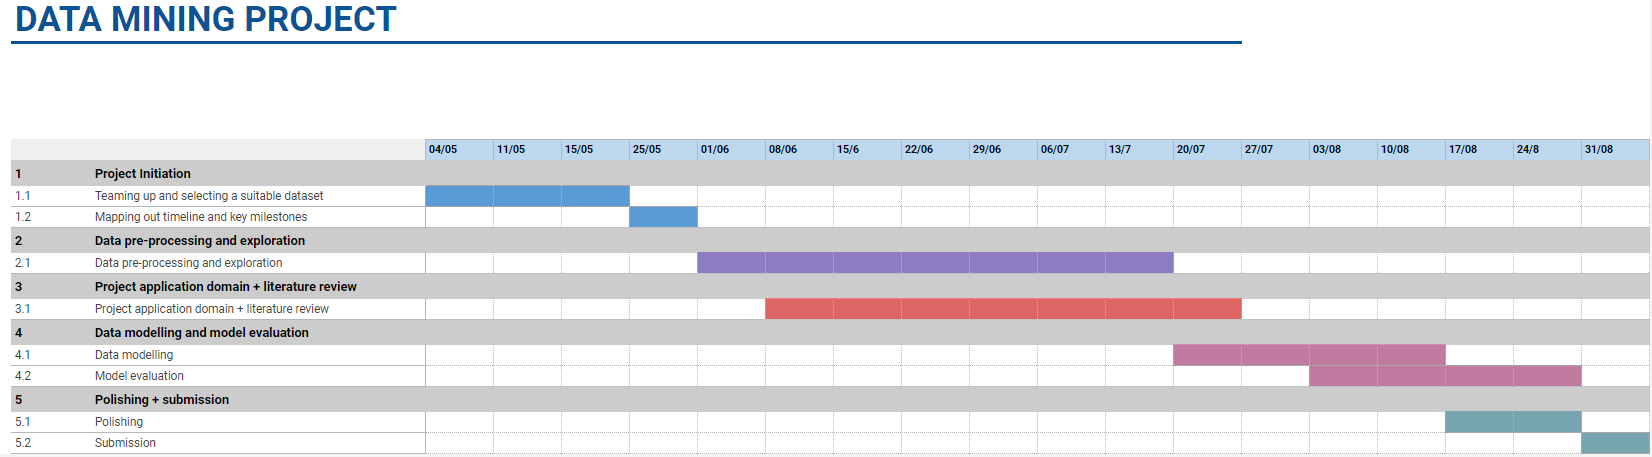

We were forced to delay some sections due to outside events, but the timeline made it easy to plan forward and estimate how long we would need after setbacks.

We settled on Google Colab as the best platform for colaboration, sometimes simultaneous, with some analysis done using Spyder.

## Reference:

Bellotti, T. and Crook, J., 2013. Forecasting and stress testing credit card default using dynamic models. International Journal of Forecasting, 29(4), pp.563-574.

Financial Conduct Authority (FCA), 2015. Credit Card Market Study: Interim Report. Viewed 06/06/2020, https://www.fca.org.uk/publication/market-studies/ms14-6-2-ccms-interim-report.pdf.

Hand, D. J., & Henley, W. E., 1997. Statistical classification methods in consumer credit scoring: A review. Journal of the Royal Statistical Society, Series A – Statistics in Society, 160(3), 523–541.

Thomas, L. C., 2000. A survey of credit and behavioural scoring: Forecasting financial risk of lending to consumers. International Journal of Forecasting, 16, 149–172. 

Finder.com, 2020. UK credit card statistics 2020. Viewed 06/06/2020, https://www.finder.com/uk/credit-card-statistics.

Yeh, I.C. and Lien, C.H., 2009. The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), pp.2473-2480.

## Appendix: program code
Our code has been included throughout this report. It is available on request through Google Colab.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('credit_card_default_data_mining.ipynb')

--2020-08-29 14:27:58--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1301 (1.3K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.27K  --.-KB/s    in 0s      

2020-08-29 14:27:58 (34.4 MB/s) - ‘colab_pdf.py’ saved [1301/1301]



ValueError: ignored